In [21]:
import pandas as pd 
import numpy as np

pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data = pd_data.drop("RID",axis=1)

In [22]:
def get_info(df):
    buy = df.loc[df["class_buys_computer"]=="yes"]
    not_buy = df.loc[df["class_buys_computer"]=="no"]
    x = np.array([len(buy)/len(df),len(not_buy)/len(df)])
    y = np.log2(x[x!=0])
    
    info_all = - sum(x[x!=0] * y)
    return info_all

In [23]:
get_info(pd_data)

0.9402859586706311

In [24]:
youth = pd_data.loc[pd_data['age'] == "youth"]
senior = pd_data.loc[pd_data['age'] == "senior"]
middle_aged = pd_data.loc[pd_data['age'] == "middle_aged"]

In [25]:
print(get_info(youth))

0.9709505944546686


In [26]:
print(get_info(senior))

0.9709505944546686


In [27]:
print(get_info(middle_aged))

-0.0


In [28]:
def get_attribute_info(df, attribute_name):
    attribute_values = pd_data[attribute_name].unique()
    get_infos = []
    for value in attribute_values:
        split_df = pd_data.loc[pd_data[attribute_name] == value]
        
        get_infos.append((len(split_df) / len(df)) * get_info(split_df))
    
    return sum(get_infos)

In [29]:
get_attribute_info(pd_data, "age")

0.6935361388961918

In [30]:
get_info(pd_data) - get_attribute_info(pd_data, "age")

0.24674981977443933

In [31]:
get_info(pd_data) - get_attribute_info(pd_data, "income")

0.02922256565895487

In [32]:
get_info(pd_data) - get_attribute_info(pd_data, "student")

0.15183550136234159

In [33]:
get_info(pd_data) - get_attribute_info(pd_data, "credit_rating")

0.04812703040826949

In [34]:
youth = pd_data.loc[pd_data['age'] == "youth"]
get_info(youth) - get_attribute_info(youth, "income")

-1.580026905978025

In [35]:
get_info(youth) - get_attribute_info(youth, "student")

-1.2367106860085422

In [36]:
get_info(youth) - get_attribute_info(youth, "credit_rating")

-1.527094404679944

In [37]:
import pandas as pd

# 파일 경로
train_path = r'C:\Users\goran\OneDrive\Documents\GitHub\python_Test\source\ch12\train.csv'
test_path = r'C:\Users\goran\OneDrive\Documents\GitHub\python_Test\source\ch12\test.csv'

# CSV 파일 읽기
train_df = pd.read_csv(train_path, encoding='cp949')
test_df = pd.read_csv(test_path, encoding='cp949')

# PassengerId 열 데이터 추출
train_id = train_df["PassengerId"].values
test_id = test_df["PassengerId"].values

# 데이터프레임 병합
all_df = pd.concat([train_df, test_df], axis=0).set_index("PassengerId")

# 결과 출력
print(all_df.head())


             Survived  Pclass  \
PassengerId                     
1                 0.0       3   
2                 1.0       1   
3                 1.0       3   
4                 1.0       1   
5                 0.0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [38]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})

# 데이터 중 age 값의 빈칸의 값을 `class의 평균값으로 채운다.
all_df["Age"].fillna(
    all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

C:\Users\goran\AppData\Local\Temp\ipykernel_20400\969990762.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})
C:\Users\goran\AppData\Local\Temp\ipykernel_20400\969990762.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["Age"].f

In [39]:
all_df["cabin_count"] = all_df["Cabin"].map(
         lambda x : len(x.split()) if type(x) == str else 0)

In [40]:
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs" 
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))

In [41]:
all_df["social_status"].value_counts()

social_status
Mr        758
Miss      258
Mrs       203
Master     61
0           9
Rev         8
Dr          8
Col         4
Name: count, dtype: int64

In [42]:
all_df[all_df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1,Miss
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1,Mrs


In [43]:
all_df = all_df.drop([62,830])
train_id =np.delete(train_id, [62-1,830-1])

In [44]:
all_df[all_df["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,0,Mr


In [45]:
all_df.groupby(["Pclass","Sex"])["Fare"].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

In [46]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462

In [47]:
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "99")

In [48]:
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]

In [49]:
y = all_df.loc[train_id, "Survived"].values
del all_df["Survived"]

In [50]:
X_df = pd.get_dummies(all_df)
X = X_df.values

In [51]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X)
X = minmax_scaler.transform(X)

In [52]:
X_train = X[:len(train_id)]
X_test = X[len(train_id):]

<Axes: >

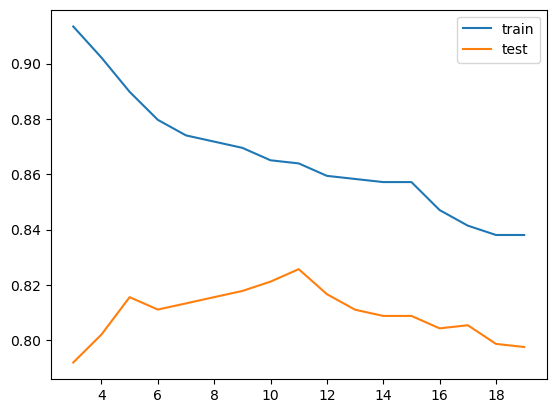

In [53]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score  

test_accuracy = []
train_accuracy = []
for idx in range(3, 20):
    df = DecisionTreeClassifier(min_samples_leaf=idx)
    acc = cross_val_score(df, X_train, y, scoring="accuracy", cv=5).mean()
    train_accuracy.append(
        accuracy_score(df.fit(X_train, y).predict(X_train), y))
    test_accuracy.append(acc)

result = pd.DataFrame(train_accuracy, index=range(3,20), columns=["train"])
result["test"] = test_accuracy

result.plot()

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

algorithmes = [LogisticRegression(), DecisionTreeClassifier()]

c_params = [0.1,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]


params = []
params.append([{
    "solver" : ["saga"],
    "penalty" : ["l1"],
    "C" : c_params
    },{
    "solver" : ['liblinear'],
    "penalty" : ["l2"],
    "C" : c_params
    }
    ])
params.append({
    "criterion" : ["gini", "entropy"],
    "max_depth" : [10,8,7,6,5,4,3,2],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9]})

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(algorithmes,params)):
    gs_estimator = GridSearchCV(
            refit="accuracy", estimator=estimator,param_grid=params, 
            scoring=scoring, cv=5, verbose=1, n_jobs=4)

    gs_estimator.fit(X_train, y)
    estimator_results.append(gs_estimator)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [56]:
estimator_results[0].best_score_

0.8268075922046594

In [57]:
estimator_results[1].best_score_

0.8358154002412238

In [58]:
import pandas as pd
from pandas import DataFrame
from collections import defaultdict

result_df_dict = {}

result_attributes = ["model", "accuracy", "penalty", "solver", "C", "criterion", "max_depth", "min_samples_leaf"]
result_dict = defaultdict(list)

algorithm_name= ["LogisticRegression", "DecisionTreeClassifier"]

for i, estimators in enumerate(estimator_results):
    number_of_estimators = len(estimators.cv_results_["mean_fit_time"])

    for idx_estimator in range(number_of_estimators):
        result_dict["model"].append(algorithm_name[i])
        result_dict["accuracy"].append(
            estimators.cv_results_["mean_test_accuracy"][idx_estimator])
            
    for param_value in estimators.cv_results_["params"]:
        for k,v in param_value.items():
            result_dict[k].append(v)
    for attr_name in result_attributes:
        if len(result_dict[attr_name]) < len(result_dict["accuracy"]):
            result_dict[attr_name].extend([None for i in range(number_of_estimators)])

In [59]:
result_df = DataFrame(result_dict, columns=result_attributes)
result_df.sort_values("accuracy",ascending=False).head(n=10)

,model,accuracy,penalty,solver,C,criterion,max_depth,min_samples_leaf
137,DecisionTreeClassifier,0.835815,None,None,NaN,entropy,4.0,7.0
138,DecisionTreeClassifier,0.835815,None,None,NaN,entropy,4.0,8.0
139,DecisionTreeClassifier,0.834679,None,None,NaN,entropy,4.0,9.0
102,DecisionTreeClassifier,0.833543,None,None,NaN,entropy,8.0,8.0
132,DecisionTreeClassifier,0.832445,None,None,NaN,entropy,4.0,2.0
135,DecisionTreeClassifier,0.832432,None,None,NaN,entropy,4.0,5.0
136,DecisionTreeClassifier,0.832432,None,None,NaN,entropy,4.0,6.0
131,DecisionTreeClassifier,0.831321,None,None,NaN,entropy,4.0,1.0
133,DecisionTreeClassifier,0.830185,None,None,NaN,entropy,4.0,3.0
119,DecisionTreeClassifier,0.830178,None,None,NaN,entropy,6.0,7.0


In [60]:
estimator_results[1].best_estimator_.feature_importances_

array([0.13376524, 0.06257368, 0.08742618, 0.        , 0.        ,
       0.18883257, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5138999 , 0.        , 0.        , 0.01350244, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [61]:
X_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

In [62]:
coef = estimator_results[1].best_estimator_.feature_importances_
coef.argsort()[::-1]

array([15,  5,  0,  2,  1, 18, 11,  3,  4,  6,  7,  8,  9, 10, 26, 12, 25,
       14, 16, 17, 19, 20, 21, 22, 23, 24, 13], dtype=int64)

In [63]:
X_df.columns[coef.argsort()[::-1]][:5]

Index(['social_status_Mr', 'Fare', 'Pclass', 'Age', 'Sex'], dtype='object')

In [64]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

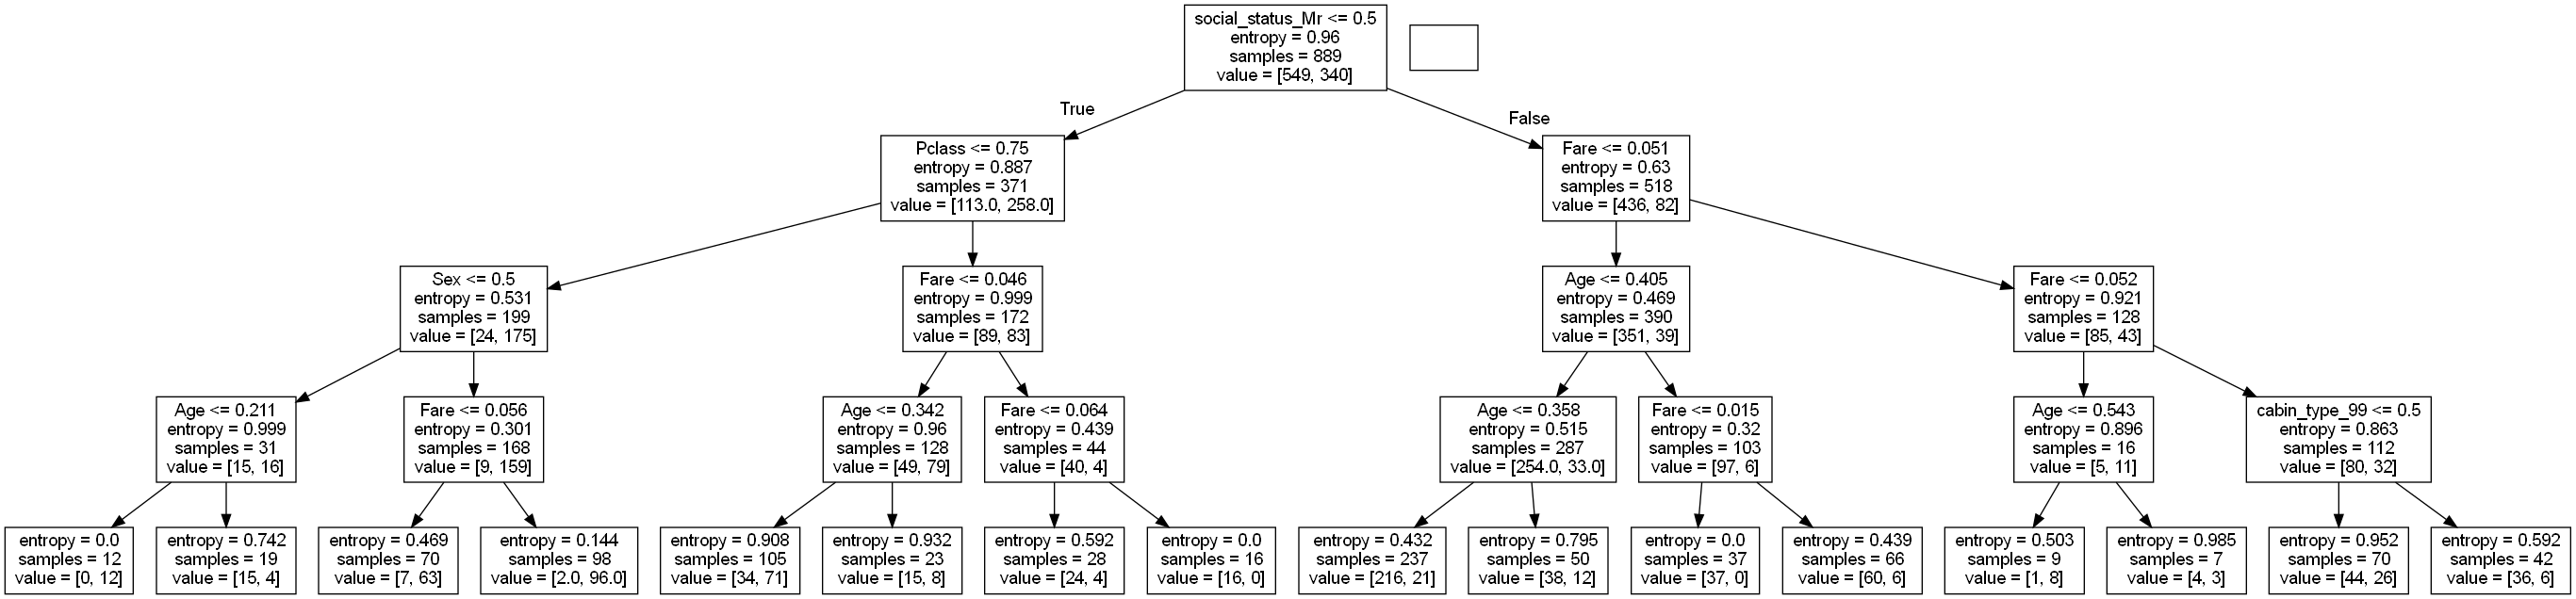

In [65]:
import pydotplus
from six import StringIO
from sklearn import tree

best_tree = estimator_results[1].best_estimator_
column_names = X_df.columns

dot_data = StringIO()
tree.export_graphviz(best_tree, out_file=dot_data, feature_names=column_names) 

graph = pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titanic.png")
from IPython.core.display import Image 
Image(filename='titanic.png')